In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import itertools
import csv
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

### Mushroom Dataset

In [4]:
mushroom = pd.read_csv("newMushroom33noise.csv", sep=',')
data = mushroom.iloc[:,1:23]
labels = mushroom.iloc[:,23].astype(str)

             precision    recall  f1-score   support

          p       0.73      0.79      0.76      1744
          e       0.61      0.52      0.56      1078

avg / total       0.68      0.69      0.68      2822

accuracy:  0.6881644223954642


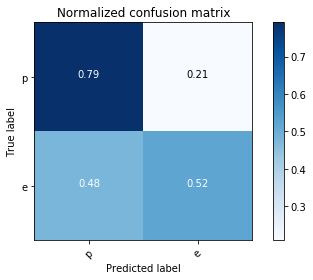

             precision    recall  f1-score   support

          p       0.71      0.86      0.77      1744
          e       0.64      0.42      0.51      1078

avg / total       0.68      0.69      0.67      2822

accuracy:  0.6899362154500355


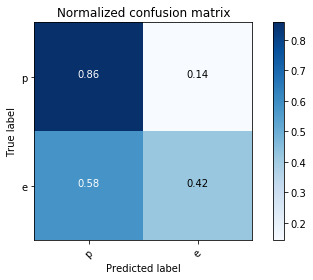

             precision    recall  f1-score   support

          p       0.70      0.86      0.77      1736
          e       0.64      0.41      0.50      1086

avg / total       0.67      0.68      0.66      2822

accuracy:  0.6832034018426648


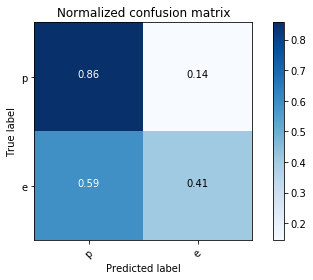

             precision    recall  f1-score   support

          p       0.74      0.84      0.78      1752
          e       0.66      0.50      0.57      1070

avg / total       0.71      0.71      0.70      2822

accuracy:  0.7133238837703756


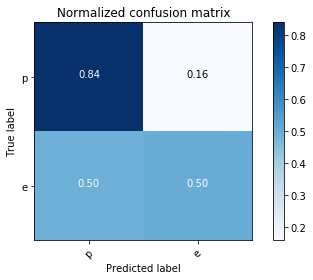

             precision    recall  f1-score   support

          p       0.71      0.83      0.76      1774
          e       0.59      0.42      0.49      1048

avg / total       0.66      0.68      0.66      2822

accuracy:  0.6771793054571226


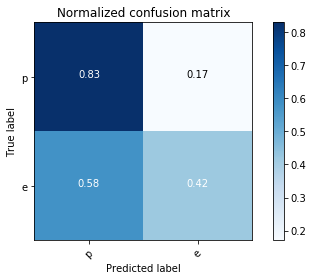

             precision    recall  f1-score   support

          p       0.72      0.82      0.77      1714
          e       0.65      0.52      0.58      1108

avg / total       0.70      0.70      0.70      2822

accuracy:  0.7030474840538625


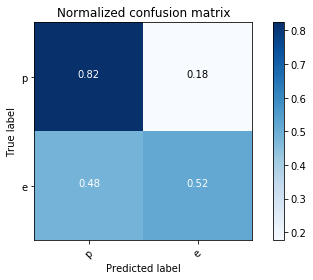

             precision    recall  f1-score   support

          p       0.72      0.87      0.79      1743
          e       0.68      0.45      0.55      1079

avg / total       0.71      0.71      0.70      2822

accuracy:  0.7108433734939759


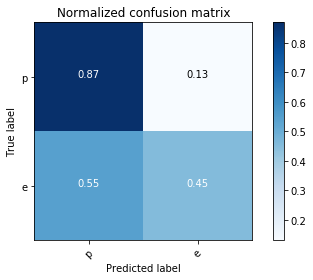

             precision    recall  f1-score   support

          p       0.71      0.84      0.77      1745
          e       0.63      0.44      0.52      1077

avg / total       0.68      0.69      0.67      2822

accuracy:  0.686392629340893


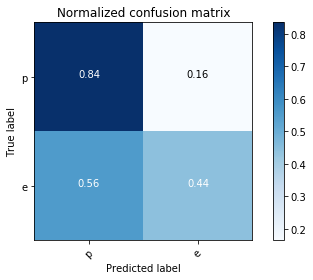

             precision    recall  f1-score   support

          p       0.71      0.87      0.78      1745
          e       0.66      0.42      0.51      1077

avg / total       0.69      0.69      0.68      2822

accuracy:  0.6948972360028348


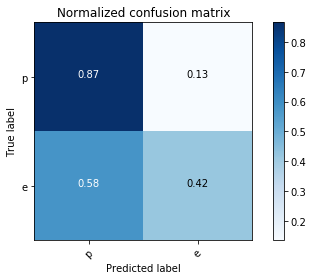

             precision    recall  f1-score   support

          p       0.73      0.85      0.78      1743
          e       0.66      0.49      0.56      1079

avg / total       0.70      0.71      0.70      2822

accuracy:  0.7094259390503189


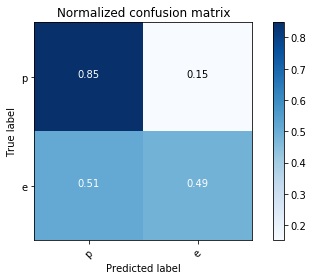

In [5]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = GaussianNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Appendicitis Dataset

In [6]:
appendicitis = pd.read_csv("appendicitis33noise.csv", sep=',')
data = appendicitis.iloc[:,1:8]
labels = appendicitis.iloc[:,8].astype(str)

             precision    recall  f1-score   support

          1       0.89      0.87      0.88        45
          0       0.33      0.38      0.35         8

avg / total       0.80      0.79      0.80        53

accuracy:  0.7924528301886793


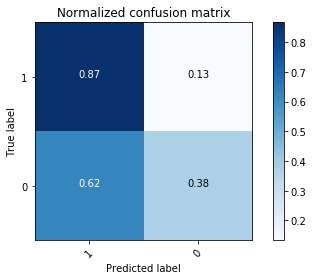

             precision    recall  f1-score   support

          1       0.74      0.80      0.77        40
          0       0.20      0.15      0.17        13

avg / total       0.61      0.64      0.62        53

accuracy:  0.6415094339622641


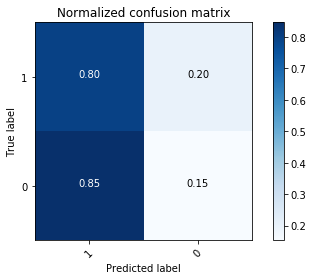

             precision    recall  f1-score   support

          1       0.83      0.81      0.82        43
          0       0.27      0.30      0.29        10

avg / total       0.73      0.72      0.72        53

accuracy:  0.7169811320754716


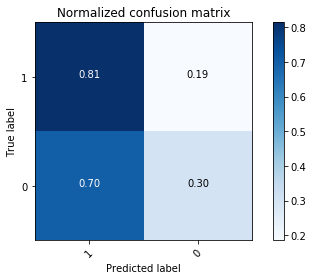

             precision    recall  f1-score   support

          1       0.84      0.86      0.85        42
          0       0.40      0.36      0.38        11

avg / total       0.75      0.75      0.75        53

accuracy:  0.7547169811320755


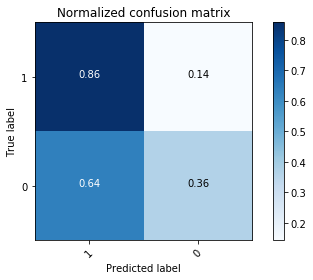

             precision    recall  f1-score   support

          1       0.80      0.98      0.88        42
          0       0.50      0.09      0.15        11

avg / total       0.74      0.79      0.73        53

accuracy:  0.7924528301886793


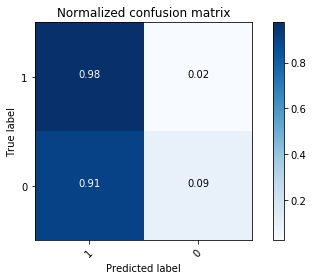

             precision    recall  f1-score   support

          1       0.82      0.95      0.88        43
          0       0.33      0.10      0.15        10

avg / total       0.73      0.79      0.74        53

accuracy:  0.7924528301886793


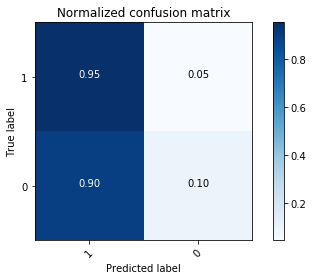

             precision    recall  f1-score   support

          1       0.67      0.74      0.70        38
          0       0.09      0.07      0.08        15

avg / total       0.50      0.55      0.52        53

accuracy:  0.5471698113207547


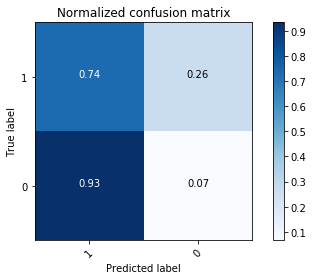

             precision    recall  f1-score   support

          1       0.88      0.62      0.73        47
          0       0.10      0.33      0.15         6

avg / total       0.79      0.58      0.66        53

accuracy:  0.5849056603773585


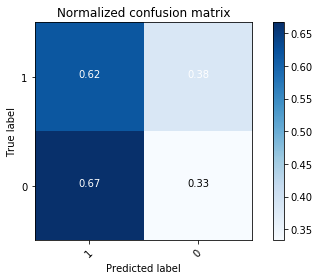

             precision    recall  f1-score   support

          1       0.80      0.98      0.88        42
          0       0.50      0.09      0.15        11

avg / total       0.74      0.79      0.73        53

accuracy:  0.7924528301886793


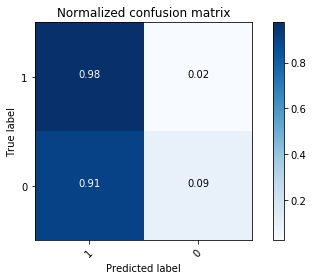

             precision    recall  f1-score   support

          1       0.88      0.88      0.88        43
          0       0.50      0.50      0.50        10

avg / total       0.81      0.81      0.81        53

accuracy:  0.8113207547169812


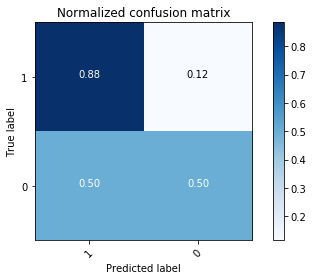

In [7]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model_poker = GaussianNB()
        dt_model_poker.fit(X_train, y_train)
        predicted = dt_model_poker.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Glass Dataset

In [8]:
glass = pd.read_csv("glass33noise.csv")
data = glass.iloc[:,1:10]
labels = glass.iloc[:,10].astype(str)

             precision    recall  f1-score   support

          1       0.43      0.72      0.53        32
          3       0.44      0.30      0.35        37
          2       0.25      0.09      0.13        11
          5       0.33      0.10      0.15        10
          7       0.17      0.67      0.27         3
          6       0.44      0.29      0.35        14

avg / total       0.40      0.39      0.36       107

accuracy:  0.3925233644859813


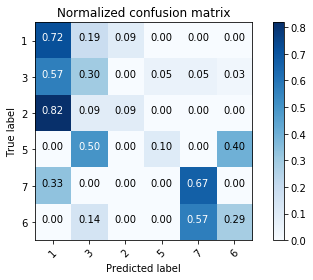

             precision    recall  f1-score   support

          1       0.51      0.82      0.63        38
          3       0.46      0.31      0.37        39
          2       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         3
          7       0.67      0.33      0.44         6
          6       0.83      0.67      0.74        15

avg / total       0.50      0.51      0.49       107

accuracy:  0.514018691588785


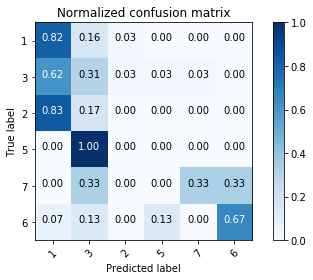

             precision    recall  f1-score   support

          1       0.43      0.69      0.53        35
          3       0.47      0.19      0.27        36
          2       0.00      0.00      0.00         8
          5       1.00      0.33      0.50         6
          7       0.67      0.40      0.50         5
          6       0.79      0.88      0.83        17

avg / total       0.51      0.47      0.45       107

accuracy:  0.4672897196261682


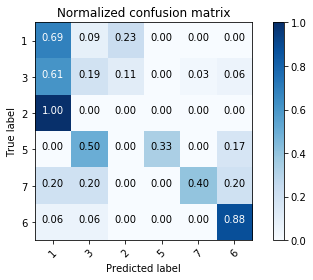

             precision    recall  f1-score   support

          1       0.48      0.66      0.55        35
          3       0.56      0.23      0.32        40
          2       0.05      0.11      0.07         9
          5       0.12      0.14      0.13         7
          7       0.25      0.25      0.25         4
          6       0.67      0.67      0.67        12

avg / total       0.46      0.40      0.40       107

accuracy:  0.40186915887850466


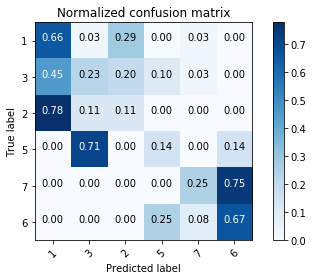

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.38      0.83      0.52        29
          3       0.57      0.18      0.27        45
          2       0.00      0.00      0.00         7
          5       0.18      0.67      0.29         3
          7       0.00      0.00      0.00         8
          6       0.67      0.80      0.73        15

avg / total       0.44      0.43      0.37       107

accuracy:  0.42990654205607476


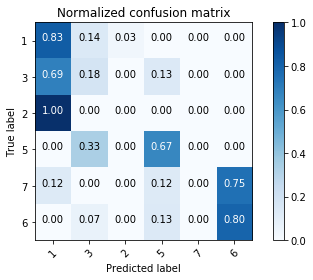

             precision    recall  f1-score   support

          1       0.55      0.39      0.46        41
          3       0.52      0.35      0.42        31
          2       0.10      0.10      0.10        10
          5       0.10      0.30      0.15        10
          7       0.00      0.00      0.00         1
          6       0.71      0.36      0.48        14

avg / total       0.48      0.34      0.38       107

accuracy:  0.3364485981308411


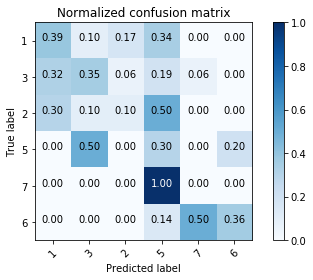

             precision    recall  f1-score   support

          1       0.42      0.71      0.53        35
          3       0.36      0.24      0.29        37
          2       0.40      0.22      0.29         9
          5       0.00      0.00      0.00         7
          7       1.00      0.33      0.50         6
          6       0.79      0.85      0.81        13

avg / total       0.45      0.46      0.43       107

accuracy:  0.45794392523364486


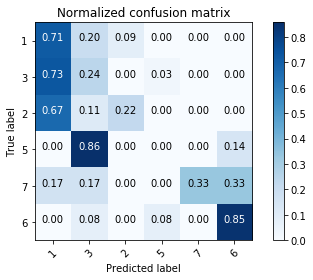

             precision    recall  f1-score   support

          1       0.49      0.80      0.61        35
          3       0.52      0.28      0.37        39
          2       0.00      0.00      0.00         8
          5       0.25      0.33      0.29         6
          7       0.50      1.00      0.67         3
          6       0.86      0.75      0.80        16

avg / total       0.51      0.52      0.49       107

accuracy:  0.5233644859813084


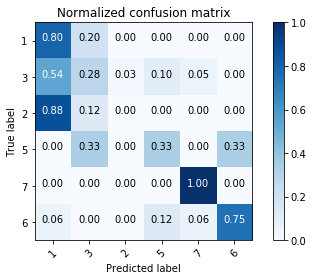

             precision    recall  f1-score   support

          1       0.38      0.47      0.42        32
          3       0.44      0.31      0.36        39
          2       0.14      0.38      0.21         8
          5       0.67      0.20      0.31        10
          7       0.00      0.00      0.00         5
          6       0.69      0.85      0.76        13

avg / total       0.43      0.40      0.40       107

accuracy:  0.40186915887850466


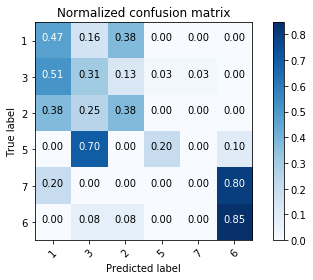

             precision    recall  f1-score   support

          1       0.47      0.61      0.53        38
          3       0.50      0.30      0.37        37
          2       0.11      0.11      0.11         9
          5       0.17      0.33      0.22         3
          7       0.36      1.00      0.53         4
          6       0.90      0.56      0.69        16

avg / total       0.50      0.46      0.46       107

accuracy:  0.45794392523364486


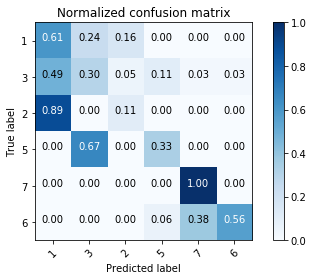

In [9]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(glass):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = GaussianNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [10]:
print (acc)
with open("accNaiveBayesWith33Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)

['Mushroom', 0.6881644223954642, 0.6899362154500355, 0.6832034018426648, 0.7133238837703756, 0.6771793054571226, 0.7030474840538625, 0.7108433734939759, 0.686392629340893, 0.6948972360028348, 0.7094259390503189, 'Appendicitis', 0.7924528301886793, 0.6415094339622641, 0.7169811320754716, 0.7547169811320755, 0.7924528301886793, 0.7924528301886793, 0.5471698113207547, 0.5849056603773585, 0.7924528301886793, 0.8113207547169812, 'Glass', 0.3925233644859813, 0.514018691588785, 0.4672897196261682, 0.40186915887850466, 0.42990654205607476, 0.3364485981308411, 0.45794392523364486, 0.5233644859813084, 0.40186915887850466, 0.45794392523364486]
